In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Load dataset
df = pd.read_csv("house_data.csv")  # Update the filename if needed

# Display the first few rows
print(df.head())

# Display column info
print(df.info())


           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810145  42491                   5                 2.50         3650   
1  6762810635  42491                   4                 2.50         2920   
2  6762810998  42491                   5                 2.75         2910   
3  6762812605  42491                   4                 2.50         3310   
4  6762812919  42491                   3                 2.00         2710   

   lot area  number of floors  waterfront present  number of views  \
0      9050               2.0                   0                4   
1      4000               1.5                   0                0   
2      9480               1.5                   0                0   
3     42998               2.0                   0                0   
4      4500               1.5                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       5  ...    

In [44]:
# Selecting feature and target variable
feature_col = "Built Year"
target_col = "Price"

# Handle missing values
df = df[[feature_col, target_col]].dropna()

# Display dataset summary
print(df.describe())


         Built Year         Price
count  14620.000000  1.462000e+04
mean    1970.926402  5.389322e+05
std       29.493625  3.675324e+05
min     1900.000000  7.800000e+04
25%     1951.000000  3.200000e+05
50%     1975.000000  4.500000e+05
75%     1997.000000  6.450000e+05
max     2015.000000  7.700000e+06


In [12]:
# Splitting data 
X = df[[feature_col]]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")


Training Data: (11696, 1), Testing Data: (2924, 1)


In [22]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


Intercept: -618106.8646022116
Coefficient: 586.5241591286203


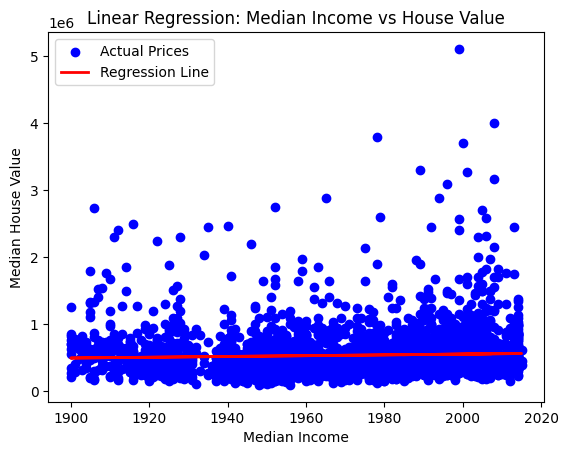

In [24]:
# Predict on test data
y_pred = model.predict(X_test)

# Scatter plot of actual vs. predicted values
plt.scatter(X_test, y_test, color='blue', label="Actual Prices")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Linear Regression: Median Income vs House Value")
plt.legend()
plt.show()


In [26]:
# Calculate R² Score and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")

# Interpretation
if r2 > 0.7:
    print("🔹 High R² indicates a strong fit!")
else:
    print("🔹 Low R² suggests the model may not be a great fit.")


R² Score: 0.0033
Mean Squared Error: 140458191356.56
🔹 Low R² suggests the model may not be a great fit.
